# Matplotlib:  Live plots

In this section, we look at how the live Matplotlib figures work

In [1]:
# Use this version for live, zoomable plots
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
# a few widely used tools from numpy
from numpy import sin, cos, exp, sqrt, pi, linspace, arange

<IPython.core.display.Javascript object>


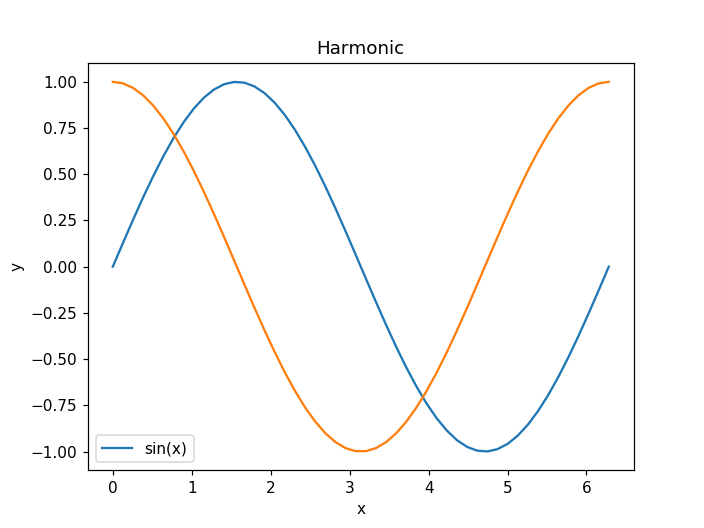

In [3]:
x = linspace(0, 2 * pi)
y = sin(x)
plt.plot(x, y, label='sin(x)')
plt.legend()
plt.title('Harmonic')
plt.xlabel('x')
plt.ylabel('y')

# Add one line to that plot
z = cos(x)
plt.plot(x, z, label='cos(x)');

## Axis sharing

The simplest way to share axes is to use the ``subplots`` function.  More
fine-grained control can be obtained by individually adding subplots and adding
share calls to those, but in most cases the functionality from ``subplots`` is sufficient:

<IPython.core.display.Javascript object>


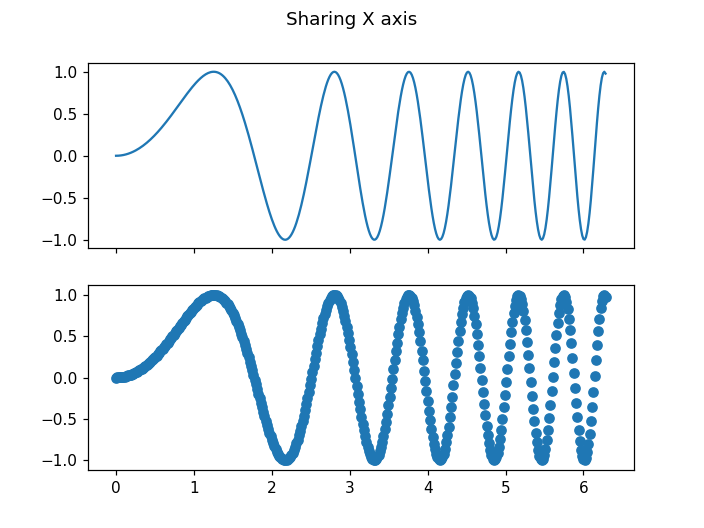

<IPython.core.display.Javascript object>


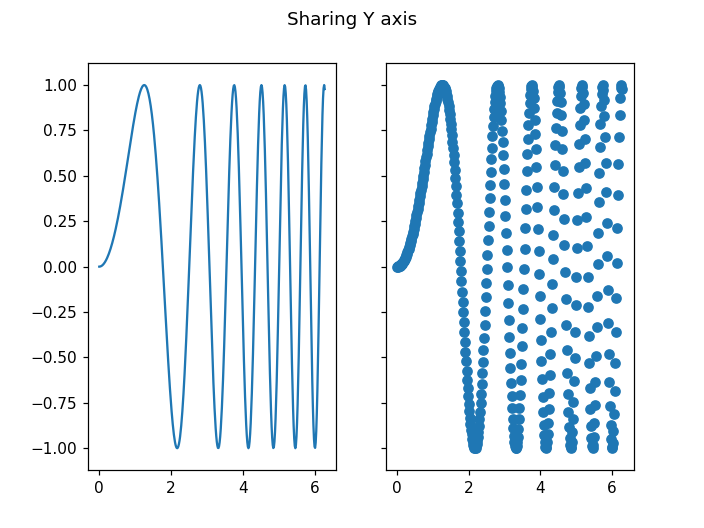

<IPython.core.display.Javascript object>


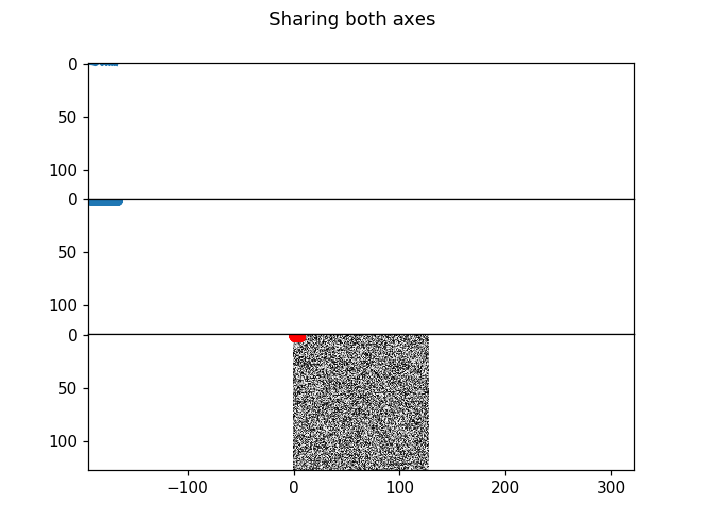

In [4]:
# Simple data to display in various forms
x = linspace(0, 2*pi, 400)
y = sin(x**2)

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.suptitle('Sharing X axis')
axarr[0].plot(x, y)
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Sharing Y axis')
ax1.plot(x, y)
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
f.suptitle('Sharing both axes')
ax1.plot(x, y)
ax2.scatter(x, y)
ax3.scatter(x, 2*y**2-1,color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

## Image display

The ``imshow`` command can display single or multi-channel images.  A simple
array of random numbers, plotted in grayscale:

<IPython.core.display.Javascript object>


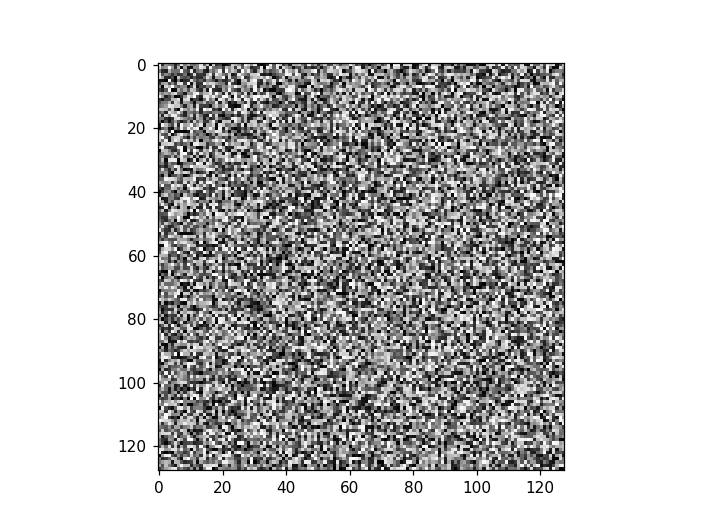

In [6]:
from matplotlib import cm

plt.figure()
plt.imshow(np.random.rand(128, 128), cmap=cm.gray, interpolation='nearest')

A real photograph is a multichannel image, `imshow` interprets it correctly:

<IPython.core.display.Javascript object>


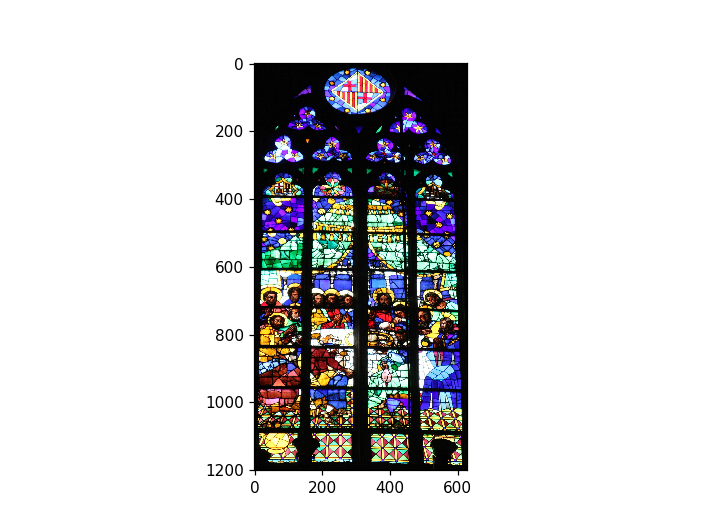

In [7]:
img = plt.imread('data/stained_glass_barcelona.png')
plt.figure()
plt.imshow(img)

### Exercise

Write a notebook where you can load an image and then perform the following operations on it:
    
1. Create a figure with four plots that show both the full-color image and color channel of the image with the right colormap for that color.  Ensure that the axes are linked so zooming in one image zooms the same region in the others.
    
2. Compute a luminosity and per-channel histogram and display all four histograms in one figure, giving each a separate plot (hint: a 4x1 plot works best for this).  Link the appropriate axes together.
    
3. Create a black-and-white (or more precisely, grayscale) version of the image.  Compare the results from a naive average of all three channels with that of a model that uses 30% red, 59% green and 11% blue, by displaying all three (full color and both grayscales) side by side with linked axes for zooming.
    
Hint: look for the matplotlib image tutorial.

## Simple 3d plotting with matplotlib

Note that you must execute at least once in your session::

In [8]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the ``projection='3d'`` keyword to ``add_subplot``::

    fig = plt.figure()
    fig.add_subplot(<other arguments here>, projection='3d')

A simple surface plot:

<IPython.core.display.Javascript object>


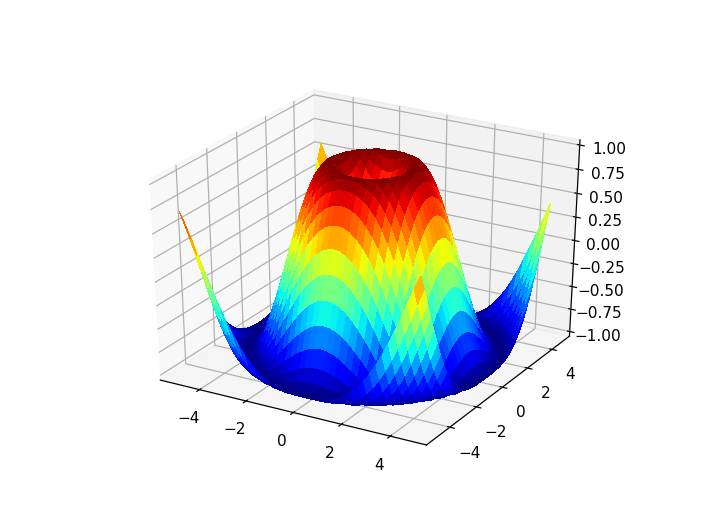

(-1.01, 1.01)

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = arange(-5, 5, 0.25)
Y = arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = sqrt(X**2 + Y**2)
Z = sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

And a parametric surface specified in cylindrical coordinates:

<IPython.core.display.Javascript object>


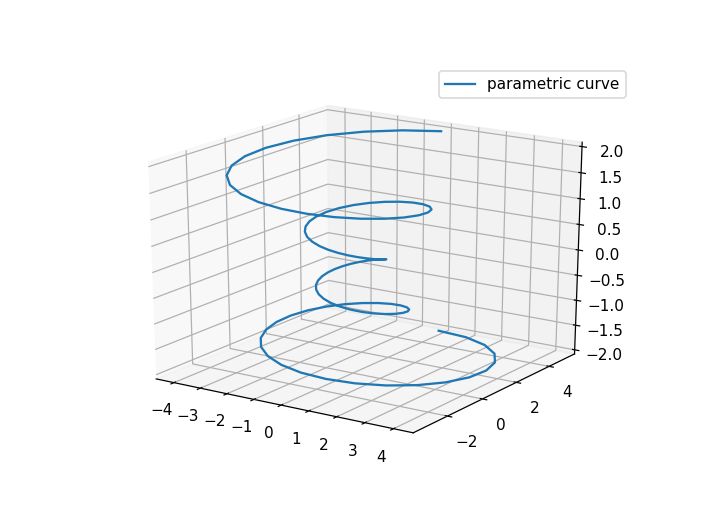

In [10]:
import matplotlib
matplotlib.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = linspace(-4*pi, 4*pi, 100)
z = linspace(-2, 2, 100)
r = z**2 + 1
x = r*sin(theta)
y = r*cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

## Basic event handling

Matplotlib has a builtin, toolkit-independent event model that is fairly rich.
If you want to develop full-fledged applications with very complex and fast
interactions, you are likely better off choosing a specific Graphical User
Interface (GUI) toolkit and using its specific event model.  But for many
scientific uses, what matplotlib offers is more than sufficient, and it has the
advantage of working identically regardless of the GUI toolkit you choose to
run matplotlib under.

Here we will cover the bare essentials only, for full details you should
consult the [event handling section](https://matplotlib.org/users/event_handling.html) of the matplotlib user guide.

The basic idea of *all* event handling is always the same: the windowing
environment registers an event (mouse movement, click, keyboard press, etc)
produced by the user.  In advance, you have registered *event handlers*:
functions you define that are meant to be called when specific types of events
occur.  The registration action is called *connecting* the event handler, and
is performed by the ``mpl_connect`` method of the figure canvas attribute (the
canvas is the drawing area of the figure object, the entire raw object where
events take place).

The windowing system will then pass the event (each event has some relevant
information that goes with it, such as which key or button was pressed) to your
function, which can act on it.  These functions are referred to as *callbacks*,
because they are meant to be 'called back' not by you, but by the windowing
toolkit when the right event goes by.

Below is the simplest possible matplotlib event handler. 

**Note:** to run this code, you need to restart your kernel, so that IPython can switch to a GUI matplotlib backend (qt5 in this case).

In [ ]:
%matplotlib qt5
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print ('button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
        event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

The ``FigureCanvas`` method ``mpl_connect`` returns a connection id which
is simply an integer.  When you want to disconnect the callback, just call::

    fig.canvas.mpl_disconnect(cid)

The most commonly used event types are ``KeyEvent`` and ``MouseEvent``, both of
which have the following attributes:

    ``x``
        x position - pixels from left of canvas

    ``y``
        y position - pixels from bottom of canvas

    ``inaxes``
        the ``matplotlib.axes.Axes`` instance if mouse is over axes

    ``xdata``
        x coord of mouse in data coords

    ``ydata``
        y coord of mouse in data coords

In addition, ``MouseEvent`` have:

    ``button``
        button pressed None, 1, 2, 3, 'up', 'down' (up and down are used for
        scroll events)

    ``key``
        the key pressed: None, any character, 'shift', 'win', or 'control'